In [ ]:
from google.colab import files

# Upload kaggle.json file
files.upload()


In [ ]:
# Install Kaggle API
!pip install -q kaggle

# Create the .kaggle directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Set permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

# Download the food101 dataset
!kaggle datasets download -d kmader/food41

# Unzip the dataset
!unzip food41.zip -d dataset

#+- 3-6 min runtime

Streaming output truncated to the last 5000 lines.
  inflating: dataset/images/tacos/1026681.jpg  
  inflating: dataset/images/tacos/1030289.jpg  
  inflating: dataset/images/tacos/1033196.jpg  
  inflating: dataset/images/tacos/1036030.jpg  
  inflating: dataset/images/tacos/1042175.jpg  
  inflating: dataset/images/tacos/1044043.jpg  
  inflating: dataset/images/tacos/1058697.jpg  
  inflating: dataset/images/tacos/1059239.jpg  
  inflating: dataset/images/tacos/1059326.jpg  
  inflating: dataset/images/tacos/1066762.jpg  
  inflating: dataset/images/tacos/1070967.jpg  
  inflating: dataset/images/tacos/1073468.jpg  
  inflating: dataset/images/tacos/1075296.jpg  
  inflating: dataset/images/tacos/1085243.jpg  
  inflating: dataset/images/tacos/108529.jpg  
  inflating: dataset/images/tacos/1086014.jpg  
  inflating: dataset/images/tacos/108945.jpg  
  inflating: dataset/images/tacos/1089575.jpg  
  inflating: dataset/images/tacos/1091159.jpg  
  inflating: dataset/images/tacos/11013

In [ ]:
!ls dataset/images

apple_pie	    eggs_benedict	     onion_rings
baby_back_ribs	    escargots		     oysters
baklava		    falafel		     pad_thai
beef_carpaccio	    filet_mignon	     paella
beef_tartare	    fish_and_chips	     pancakes
beet_salad	    foie_gras		     panna_cotta
beignets	    french_fries	     peking_duck
bibimbap	    french_onion_soup	     pho
bread_pudding	    french_toast	     pizza
breakfast_burrito   fried_calamari	     pork_chop
bruschetta	    fried_rice		     poutine
caesar_salad	    frozen_yogurt	     prime_rib
cannoli		    garlic_bread	     pulled_pork_sandwich
caprese_salad	    gnocchi		     ramen
carrot_cake	    greek_salad		     ravioli
ceviche		    grilled_cheese_sandwich  red_velvet_cake
cheesecake	    grilled_salmon	     risotto
cheese_plate	    guacamole		     samosa
chicken_curry	    gyoza		     sashimi
chicken_quesadilla  hamburger		     scallops
chicken_wings	    hot_and_sour_soup	     seaweed_salad
chocolate_cake	    hot_dog		     shrimp_and_grits
chocolate_mousse    huevo

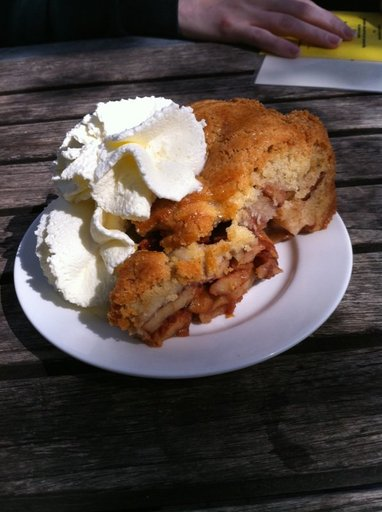

In [ ]:
#test images

import cv2
from google.colab.patches import cv2_imshow # Import the alternative function


imagesss = cv2.imread('dataset/images/apple_pie/103801.jpg')
cv2_imshow(imagesss) # Use cv2_imshow instead of cv2.imshow

In [ ]:
import os
import shutil
import os
import shutil

def organize_dataset(file_path, images_path, output_dir, selected_classes):
    """
    Organize dataset by copying only specific classes (folders) and their images
    as listed in file_path and defined in selected_classes.

    Args:
        file_path (str): Path to .txt file containing image paths.
        images_path (str): Base path to source image directory.
        output_dir (str): Path to output directory for reorganized dataset.
        selected_classes (list): List of class names to copy.
    """
    # Create a set of selected classes for faster lookup
    selected_classes_set = set(selected_classes)

    # Read all lines from the txt file
    with open(file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        # Split the line into class name (folder name) and image file name
        class_name, img_file = line.strip().split('/')

        # Skip classes that are not in the selected_classes
        if class_name not in selected_classes_set:
            continue

        # Build full source and target paths
        source_path = os.path.join(images_path, class_name, img_file + '.jpg')
        target_dir = os.path.join(output_dir, class_name)

        # Skip if the image file doesn't exist
        if not os.path.exists(source_path):
            continue

        # Ensure the target directory for the class exists
        os.makedirs(target_dir, exist_ok=True)

        # Copy the image to the target directory
        shutil.copy(source_path, target_dir)

# Example: Specify the dessert classes you want to use
dessert_classes = [
    'churros', 'ice_cream', 'macarons', 'donuts', 'tiramisu',
    'cup_cakes', 'red_velvet_cake', 'baklava', 'beignets', 'waffles'
]

# Restructure training and testing datasets
images_path1 = 'dataset/images'
train_file1 = 'dataset/meta/meta/train.txt'
test_file1 = 'dataset/meta/meta/test.txt'

organize_dataset(train_file1, images_path1, 'dataset/train', dessert_classes)  # Organize train set
organize_dataset(test_file1, images_path1, 'dataset/test', dessert_classes)   # Organize test set


In [ ]:
#count folders
import os

def count_folders(directory):
    """
    Counts the number of folders inside the given directory.

    Args:
        directory (str): Path to the directory.

    Returns:
        int: Number of folders inside the directory.
    """
    return len([d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))])

# Example usage
folder_count = count_folders('dataset/train')
print(f"Number of folders in 'dataset/train': {folder_count}")
folder_count1 = count_folders('dataset/test')
print(f"Number of folders in 'dataset/test': {folder_count1}")

#count files
import os

def count_files(directory):
    """
    Counts the number of files inside the given directory.

    Args:
        directory (str): Path to the folder.

    Returns:
        int: Number of files inside the folder.
    """
    return len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])

# Example usage
image_count = count_files('dataset/train/ice_cream')
print(f"Number of images in 'dataset/train/ice_cream': {image_count}")
image_count1 = count_files('dataset/test/churros')
print(f"Number of images in 'dataset/test/churros': {image_count1}")


Number of folders in 'dataset/train': 10
Number of folders in 'dataset/test': 10
Number of images in 'dataset/train/ice_cream': 750
Number of images in 'dataset/test/churros': 250


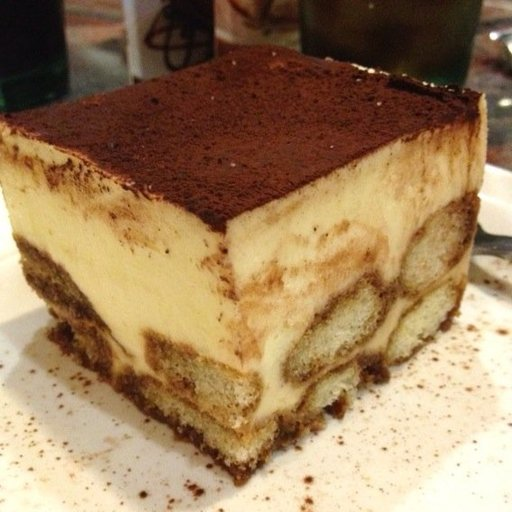

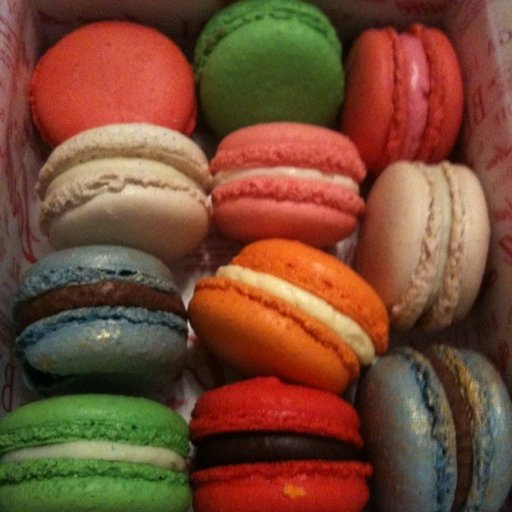

In [ ]:
imagesss = cv2.imread('/content/dataset/test/tiramisu/1016527.jpg')
cv2_imshow(imagesss) # Use cv2_imshow instead of cv2.imshow
imagesss = cv2.imread('/content/dataset/test/macarons/1027269.jpg')
cv2_imshow(imagesss)

In [ ]:
'''
np.save('classes.npy', lb.classes_)  # Save the class names to a file

in app:
import numpy as np
class_names = np.load('classes.npy')

import numpy as np

# Example output from the model
prediction = model.predict(image)
class_index = np.argmax(prediction)  # Get the index of the predicted class
class_name = class_names[class_index]  # Map index back to class name

print(f"Predicted label: {class_name}")


'''

In [ ]:
'''from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from keras import backend as K
from tensorflow.keras.regularizers import l2'''

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, Activation, BatchNormalization,
                                     MaxPooling2D, Dropout, GlobalAveragePooling2D,
                                     Dense, Flatten)
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model


model_old = load_model("food_model (70 66 72).h5")


In [ ]:
model_old.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 192)    │       221,376 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 10,473,484 (39.95 MB)

 Trainable params: 10,471,370 (39.95 MB)

 Non-trainable params: 2,112 (8.25 KB)

 Optimizer params: 2 (12.00 B)

In [ ]:
model = Sequential()
for layer in model_old.layers[:-2]:  # Add all layers except the last Dropout and Dense layers
    model.add(layer)

model.add(Dense(10, name='dense_1'))
model.add(Activation("softmax", name='activation_7'))


In [ ]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 192)    │       221,376 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 10,470,912 (39.94 MB)

 Trainable params: 10,468,800 (39.94 MB)

 Non-trainable params: 2,112 (8.25 KB)

In [ ]:
'''
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


'''

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training
'''
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)'''

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2  # Reserve 20% for validation
)

# Rescaling for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Training generator (80% of training data)
train_generator = train_datagen.flow_from_directory(
    directory='dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset="training"  # Training subset
)

# Validation generator (20% of training data)
validation_generator = train_datagen.flow_from_directory(
    directory='dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # Ensure validation order is consistent
    subset="validation"  # Validation subset
)

# Test generator remains unchanged
test_generator = test_datagen.flow_from_directory(
    directory='dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # Ensure validation order is consistent
)

'''
validation set = test set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Rescaling for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    directory='dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    directory='dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
'''
print(f"Class indices train: {train_generator.class_indices}")  # Display folder-to-label mapping
print(f"Class indices test: {test_generator.class_indices}")  # Display folder-to-label mapping



Found 6000 images belonging to 10 classes.
Found 1500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Class indices train: {'baklava': 0, 'beignets': 1, 'churros': 2, 'cup_cakes': 3, 'donuts': 4, 'ice_cream': 5, 'macarons': 6, 'red_velvet_cake': 7, 'tiramisu': 8, 'waffles': 9}
Class indices test: {'baklava': 0, 'beignets': 1, 'churros': 2, 'cup_cakes': 3, 'donuts': 4, 'ice_cream': 5, 'macarons': 6, 'red_velvet_cake': 7, 'tiramisu': 8, 'waffles': 9}


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Learning rate scheduler
'''def lr_schedule(epoch, lr):
    return lr * 0.95 if epoch > 5 else lr
'''

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',       # Metric to monitor (e.g., validation loss)
    factor=0.5,               # Reduce learning rate by this factor
    patience=3,               # Wait for 3 epochs with no improvement
    verbose=1,                # Prints updates
    min_lr=1e-6               # Minimum learning rate to prevent it from becoming too small
)

# Build and compile the model
# model = FoodModel.build(width=224, height=224, depth=3, classes=10)  # Adjust classes for 10-class testing
#opt = Adam(learning_rate=1e-3)
opt = Adam(learning_rate=2e-4)
#opt = Adam(learning_rate=1e-4)

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Callbacks
checkpoint = ModelCheckpoint('food_model.h5', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#callbacks = [checkpoint, LearningRateScheduler(lr_schedule), early_stopping]
callbacks = [checkpoint, early_stopping, reduce_lr]

# Train the model
H = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    epochs=20,
    callbacks=callbacks
)

print("Model training complete and saved as 'food_model.h5'.")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.2441 - loss: 3.8514

188/188 ━━━━━━━━━━━━━━━━━━━━ 145s 642ms/step - accuracy: 0.2443 - loss: 3.8504 - val_accuracy: 0.4480 - val_loss: 2.9935 - learning_rate: 2.0000e-04
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 100s 530ms/step - accuracy: 0.3573 - loss: 3.4668 - val_accuracy: 0.4367 - val_loss: 3.4554 - learning_rate: 2.0000e-04
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 141s 527ms/step - accuracy: 0.4049 - loss: 3.4029 - val_accuracy: 0.3313 - val_loss: 4.6488 - learning_rate: 2.0000e-04
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.4196 - loss: 3.3896
Epoch 4: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-05.
188/188 ━━━━━━━━━━━━━━━━━━━━ 143s 532ms/step - accuracy: 0.4196 - loss: 3.3894 - val_accuracy: 0.3347 - val_loss: 4.3648 - learning_rate: 2.0000e-04
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 535ms/step - accuracy: 0.4593 - loss: 3.2298 - val_accuracy: 0.4967 - val_loss: 3.0566 - learning_rate: 1.0000e-04
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - ac

188/188 ━━━━━━━━━━━━━━━━━━━━ 100s 534ms/step - accuracy: 0.4778 - loss: 3.0455 - val_accuracy: 0.5373 - val_loss: 2.8024 - learning_rate: 1.0000e-04
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 536ms/step - accuracy: 0.4896 - loss: 2.9292 - val_accuracy: 0.3893 - val_loss: 3.5631 - learning_rate: 1.0000e-04
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 139s 520ms/step - accuracy: 0.5050 - loss: 2.7939 - val_accuracy: 0.5333 - val_loss: 2.8171 - learning_rate: 1.0000e-04
Epoch 9/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.5173 - loss: 2.7076

188/188 ━━━━━━━━━━━━━━━━━━━━ 143s 524ms/step - accuracy: 0.5173 - loss: 2.7076 - val_accuracy: 0.5047 - val_loss: 2.7308 - learning_rate: 1.0000e-04
Epoch 10/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.5344 - loss: 2.6450

188/188 ━━━━━━━━━━━━━━━━━━━━ 99s 528ms/step - accuracy: 0.5344 - loss: 2.6451 - val_accuracy: 0.5140 - val_loss: 2.7006 - learning_rate: 1.0000e-04
Epoch 11/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.5271 - loss: 2.6676

188/188 ━━━━━━━━━━━━━━━━━━━━ 100s 531ms/step - accuracy: 0.5271 - loss: 2.6674 - val_accuracy: 0.5627 - val_loss: 2.4890 - learning_rate: 1.0000e-04
Epoch 12/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 534ms/step - accuracy: 0.5415 - loss: 2.5872 - val_accuracy: 0.5480 - val_loss: 2.6286 - learning_rate: 1.0000e-04
Epoch 13/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 143s 541ms/step - accuracy: 0.5504 - loss: 2.5336 - val_accuracy: 0.4847 - val_loss: 3.1075 - learning_rate: 1.0000e-04
Epoch 14/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.5640 - loss: 2.4414
Epoch 14: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
188/188 ━━━━━━━━━━━━━━━━━━━━ 140s 529ms/step - accuracy: 0.5639 - loss: 2.4416 - val_accuracy: 0.5380 - val_loss: 2.7154 - learning_rate: 1.0000e-04
Epoch 15/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 528ms/step - accuracy: 0.5635 - loss: 2.4342 - val_accuracy: 0.5580 - val_loss: 2.4898 - learning_rate: 5.0000e-05
Epoch 16/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/ste

188/188 ━━━━━━━━━━━━━━━━━━━━ 99s 524ms/step - accuracy: 0.5906 - loss: 2.3305 - val_accuracy: 0.5940 - val_loss: 2.3562 - learning_rate: 5.0000e-05
Epoch 17/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 527ms/step - accuracy: 0.6105 - loss: 2.2373 - val_accuracy: 0.5800 - val_loss: 2.3666 - learning_rate: 5.0000e-05
Epoch 18/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 99s 528ms/step - accuracy: 0.5865 - loss: 2.2389 - val_accuracy: 0.5793 - val_loss: 2.4310 - learning_rate: 5.0000e-05
Epoch 19/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.5975 - loss: 2.1770
Epoch 19: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
188/188 ━━━━━━━━━━━━━━━━━━━━ 141s 523ms/step - accuracy: 0.5975 - loss: 2.1769 - val_accuracy: 0.5493 - val_loss: 2.5351 - learning_rate: 5.0000e-05
Epoch 20/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.6025 - loss: 2.1150

188/188 ━━━━━━━━━━━━━━━━━━━━ 101s 535ms/step - accuracy: 0.6026 - loss: 2.1148 - val_accuracy: 0.5967 - val_loss: 2.2305 - learning_rate: 2.5000e-05
Model training complete and saved as 'food_model.h5'.


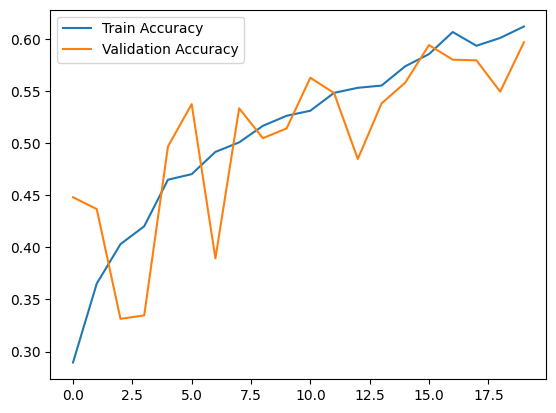

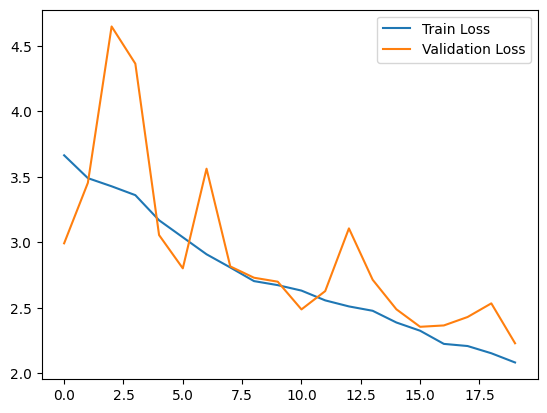

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(H.history['accuracy'], label='Train Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(H.history['loss'], label='Train Loss')
plt.plot(H.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
# Save label mapping
import numpy as np


np.save('classes.npy', train_generator.class_indices)
print("Class indices saved.")

# Save training history
import pickle
with open('training_history.pkl', 'wb') as f:
    pickle.dump(H.history, f)


Class indices saved.


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import random
import pickle

In [ ]:
#Load the Saved Model
model = load_model("food_model.h5")  # Path to your saved model

#Load the Classes File (classes.npy)
class_indices = np.load("classes.npy", allow_pickle=True).item()  # Load class-to-index mapping
idx_to_class = {v: k for k, v in class_indices.items()}  # Reverse mapping for class names

#Load the Training History File (traininghistory.pkl)
with open("training_history.pkl", "rb") as f:
    history = pickle.load(f)

In [ ]:
#Result of the Training

# Display the final training and validation accuracy
final_training_accuracy = history['accuracy'][-1]
final_validation_accuracy = history['val_accuracy'][-1]
print(f"Final Training Accuracy: {final_training_accuracy:.2f}")
print(f"Final Validation Accuracy: {final_validation_accuracy:.2f}")


Final Training Accuracy: 0.61
Final Validation Accuracy: 0.60


In [ ]:
#Evaluate the Model on the Entire Test Dataset

test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Loss: {test_loss:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.6505 - loss: 2.1313
Test Loss: 2.21
Test Accuracy: 0.63


In [ ]:
#Make Predictions on the Entire Test Dataset

predictions = model.predict(test_generator, steps=len(test_generator))  # Predict probabilities for all test images
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices
true_classes = test_generator.classes  # Get true labels from the generator

# Display the overall prediction accuracy
overall_accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Prediction Accuracy (Test Dataset): {overall_accuracy:.2f}")

79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step
Prediction Accuracy (Test Dataset): 0.63


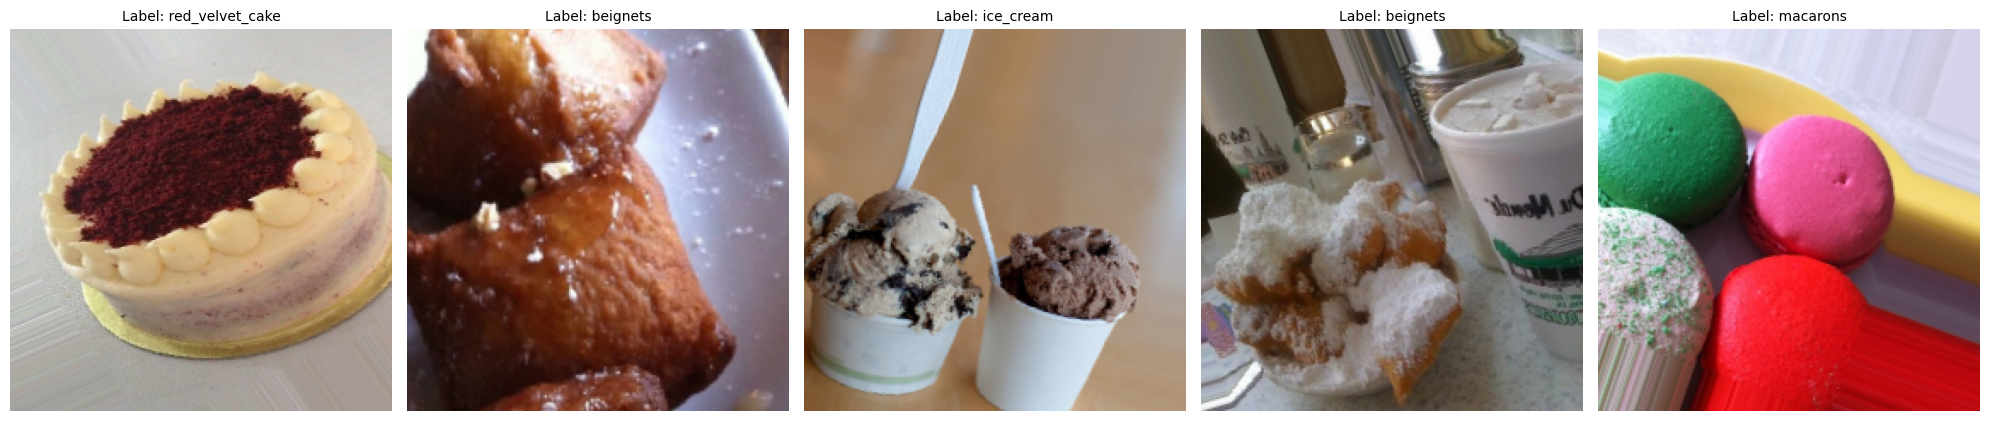

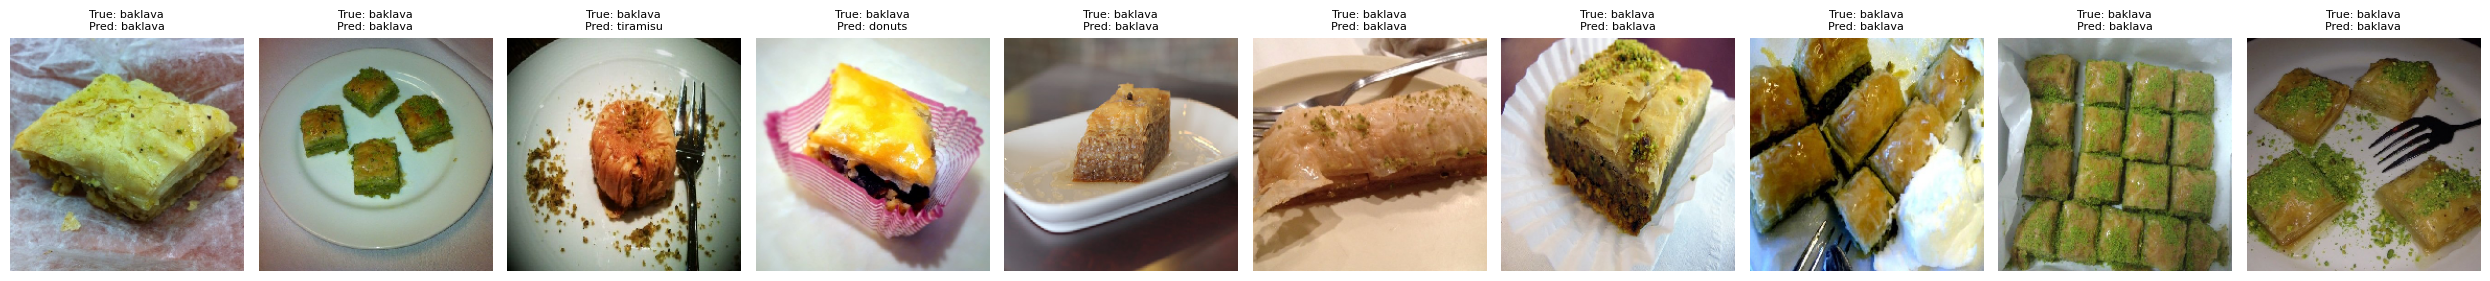

In [ ]:
#train
train_images, train_labels = next(train_generator)  # Fetch one batch of training data

# Select 5 random indices
random_train_indices = random.sample(range(len(train_images)), 5)

# Plot 5 training images with their true labels
fig, axes = plt.subplots(ncols=5, figsize=(20, 5))
for i, idx in enumerate(random_train_indices):
    axes[i].imshow(train_images[idx])  # Display the image
    true_label = idx_to_class[np.argmax(train_labels[idx])]  # Get the true class name
    axes[i].set_title(f"Label: {true_label}", fontsize=10)  # Show the true label
    axes[i].axis("off")  # Turn off axis ticks for better visualization
plt.tight_layout()
plt.show()

#test
# Get a batch of test images and their true labels
test_images, test_labels = next(test_generator)  # Fetch one batch of test data

# Select 10 random indices
random_indices = random.sample(range(len(test_images)), 10)

# Plot 10 test images with their true and predicted labels
fig, axes = plt.subplots(ncols=10, figsize=(25, 5))
for i, idx in enumerate(random_indices):
    axes[i].imshow(test_images[idx])  # Display the image
    true_label = idx_to_class[np.argmax(test_labels[idx])]  # Get the true class name
    #predicted_label = idx_to_class[np.argmax(predictions[idx])]  # Get the predicted class name
    predicted_label = idx_to_class[predicted_classes[idx]]  # Get the predicted class name
    axes[i].set_title(f"True: {true_label}\nPred: {predicted_label}", fontsize=8)
    axes[i].axis("off")
plt.tight_layout()
plt.show()

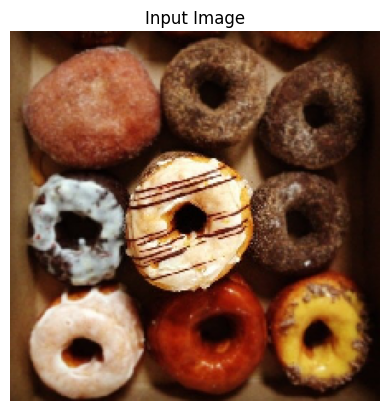

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted Class: donuts


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Load and preprocess a single image from a specified path
def predict_single_image(model, image_path, class_mapping):
    # Step 1: Load the image
    img = load_img(image_path, target_size=(224, 224))  # Resize to model's input size
    plt.imshow(img)  # Display the image
    plt.axis("off")
    plt.title("Input Image")
    plt.show()

    # Step 2: Convert the image to an array
    img_array = img_to_array(img)  # Convert to NumPy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, height, width, channels)
    img_array = img_array / 255.0  # Normalize the pixel values to [0, 1]

    # Step 3: Make a prediction
    predictions = model.predict(img_array)  # Get prediction probabilities
    predicted_class_index = np.argmax(predictions[0])  # Get the index of the highest probability
    predicted_class_name = class_mapping[predicted_class_index]  # Map index to class name

    # Step 4: Display the prediction
    print(f"Predicted Class: {predicted_class_name}")
    return predicted_class_name

# Example usage
image_path = "/content/dataset/test/donuts/1231330.jpg"  # Replace with the path to your image
#image_path = "/content/42361.jpg"  # Replace with the path to your image

predicted_label = predict_single_image(model, image_path, idx_to_class)


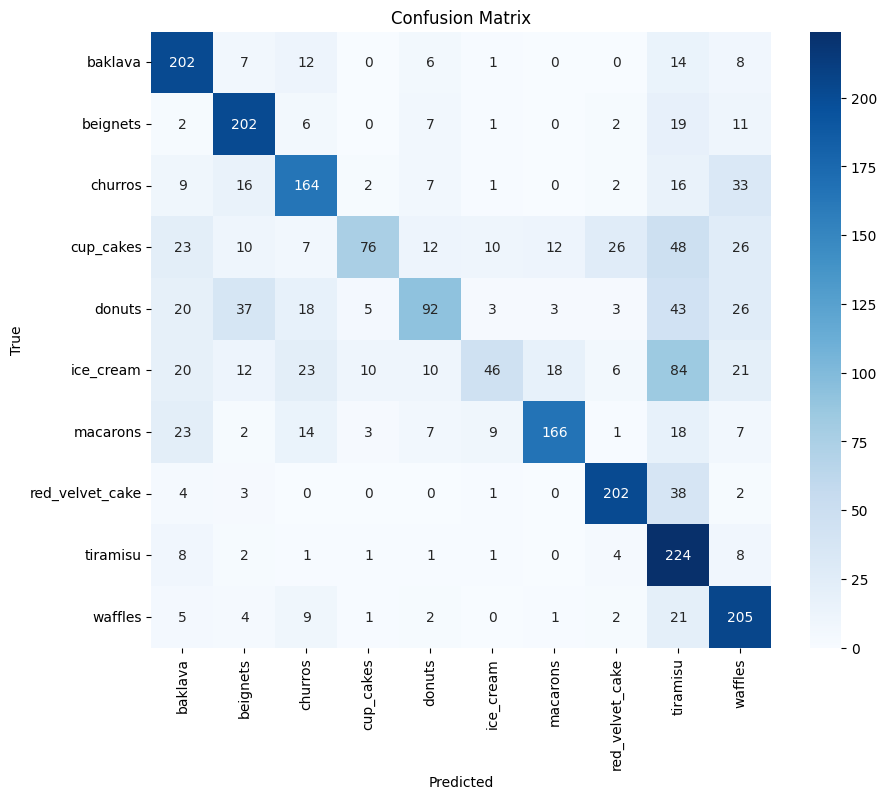

In [ ]:
#Generate and Plot Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)  # Create confusion matrix

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_indices.keys(), yticklabels=class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_indices.keys()))


Classification Report:
                 precision    recall  f1-score   support

        baklava       0.64      0.81      0.71       250
       beignets       0.68      0.81      0.74       250
        churros       0.65      0.66      0.65       250
      cup_cakes       0.78      0.30      0.44       250
         donuts       0.64      0.37      0.47       250
      ice_cream       0.63      0.18      0.28       250
       macarons       0.83      0.66      0.74       250
red_velvet_cake       0.81      0.81      0.81       250
       tiramisu       0.43      0.90      0.58       250
        waffles       0.59      0.82      0.69       250

       accuracy                           0.63      2500
      macro avg       0.67      0.63      0.61      2500
   weighted avg       0.67      0.63      0.61      2500



# **NOTE**

In [ ]:
#first run of training on past model fine tune to new 10 classes
'''
20 epoch, 2e-4, reduceonplateu patience 3 factor 0.5
61/60/63

Classification Report:
                 precision    recall  f1-score   support

        baklava       0.64      0.81      0.71       250
       beignets       0.68      0.81      0.74       250
        churros       0.65      0.66      0.65       250
      cup_cakes       0.78      0.30      0.44       250
         donuts       0.64      0.37      0.47       250
      ice_cream       0.63      0.18      0.28       250
       macarons       0.83      0.66      0.74       250
red_velvet_cake       0.81      0.81      0.81       250
       tiramisu       0.43      0.90      0.58       250
        waffles       0.59      0.82      0.69       250

       accuracy                           0.63      2500
      macro avg       0.67      0.63      0.61      2500
   weighted avg       0.67      0.63      0.61      2500
'''

#second run, removing tiramisu -> chocolate cake
'''
20 epoch, 2e-4, reduceonplateu patience 3 factor 0.5
63/60/66

Classification Report:
                 precision    recall  f1-score   support

        baklava       0.73      0.79      0.76       250
       beignets       0.67      0.83      0.74       250
 chocolate_cake       0.75      0.59      0.66       250
        churros       0.63      0.71      0.67       250
      cup_cakes       0.69      0.39      0.50       250
         donuts       0.49      0.58      0.53       250
      ice_cream       0.56      0.31      0.40       250
       macarons       0.71      0.72      0.71       250
red_velvet_cake       0.84      0.86      0.85       250
        waffles       0.59      0.85      0.70       250

       accuracy                           0.66      2500
      macro avg       0.67      0.66      0.65      2500
   weighted avg       0.67      0.66      0.65      2500
'''

#third run, continuing second run
'''
1e-4 reduceonplateu, patience 5 factor 0.5, 20 epoch
70/64/71
Classification Report:
                 precision    recall  f1-score   support

        baklava       0.81      0.71      0.75       250
       beignets       0.68      0.84      0.75       250
 chocolate_cake       0.70      0.79      0.74       250
        churros       0.70      0.74      0.72       250
      cup_cakes       0.77      0.48      0.59       250
         donuts       0.53      0.66      0.59       250
      ice_cream       0.70      0.37      0.49       250
       macarons       0.88      0.77      0.82       250
red_velvet_cake       0.82      0.89      0.85       250
        waffles       0.67      0.88      0.76       250

       accuracy                           0.71      2500
      macro avg       0.72      0.71      0.71      2500
   weighted avg       0.72      0.71      0.71      2500

'''

#forth run, continue
'''
1e-4 reduceonpalteu, patience 5, factor 0.5, 20 epoch
75/66/74

Classification Report:
                 precision    recall  f1-score   support

        baklava       0.69      0.88      0.77       250
       beignets       0.79      0.80      0.80       250
 chocolate_cake       0.76      0.74      0.75       250
        churros       0.71      0.85      0.77       250
      cup_cakes       0.78      0.60      0.68       250
         donuts       0.60      0.59      0.59       250
      ice_cream       0.71      0.47      0.57       250
       macarons       0.89      0.77      0.82       250
red_velvet_cake       0.89      0.83      0.86       250
        waffles       0.64      0.85      0.73       250

       accuracy                           0.74      2500
      macro avg       0.75      0.74      0.73      2500
   weighted avg       0.75      0.74      0.73      2500
'''

#fifth run, continue but change last dropout from 0.2 to 0.4
'''
2e-4, patience 3, factor 0.5, epochs 20
75/66/74

Classification Report:
                 precision    recall  f1-score   support

        baklava       0.78      0.83      0.81       250
       beignets       0.80      0.78      0.79       250
 chocolate_cake       0.73      0.78      0.75       250
        churros       0.68      0.88      0.77       250
      cup_cakes       0.87      0.58      0.69       250
         donuts       0.61      0.65      0.63       250
      ice_cream       0.69      0.44      0.54       250
       macarons       0.77      0.84      0.81       250
red_velvet_cake       0.92      0.80      0.85       250
        waffles       0.69      0.87      0.77       250

       accuracy                           0.74      2500
      macro avg       0.75      0.74      0.74      2500
   weighted avg       0.75      0.74      0.74      2500
'''

#sixth run, take fifth run and continue
'''
20 epochs, 1e-4 reduceonplateu patience 5
75/66/76
Classification Report:
                 precision    recall  f1-score   support

        baklava       0.70      0.89      0.78       250
       beignets       0.78      0.81      0.79       250
 chocolate_cake       0.70      0.78      0.74       250
        churros       0.87      0.78      0.83       250
      cup_cakes       0.81      0.65      0.72       250
         donuts       0.58      0.67      0.62       250
      ice_cream       0.77      0.46      0.58       250
       macarons       0.91      0.77      0.83       250
red_velvet_cake       0.86      0.85      0.86       250
        waffles       0.69      0.90      0.78       250

       accuracy                           0.76      2500
      macro avg       0.77      0.76      0.75      2500
   weighted avg       0.77      0.76      0.75      2500

'''
#reset and take base 63/60/66 change last dropout 0.2->0.4
'''
lr 1e-4, patience 5, factor 0.5, 40 epochs
72/64/69

Classification Report:
                 precision    recall  f1-score   support

        baklava       0.75      0.76      0.75       250
       beignets       0.71      0.82      0.76       250
 chocolate_cake       0.72      0.75      0.73       250
        churros       0.60      0.86      0.71       250
      cup_cakes       0.85      0.44      0.58       250
         donuts       0.57      0.48      0.52       250
      ice_cream       0.68      0.36      0.47       250
       macarons       0.80      0.73      0.77       250
red_velvet_cake       0.85      0.84      0.85       250
        waffles       0.56      0.88      0.69       250

       accuracy                           0.69      2500
      macro avg       0.71      0.69      0.68      2500
   weighted avg       0.71      0.69      0.68      2500

'''

'\n20 epoch, 2e-4, reduceonplateu patience 3 factor 0.5\n63/60/66\n\nClassification Report:\n                 precision    recall  f1-score   support\n\n        baklava       0.73      0.79      0.76       250\n       beignets       0.67      0.83      0.74       250\n chocolate_cake       0.75      0.59      0.66       250\n        churros       0.63      0.71      0.67       250\n      cup_cakes       0.69      0.39      0.50       250\n         donuts       0.49      0.58      0.53       250\n      ice_cream       0.56      0.31      0.40       250\n       macarons       0.71      0.72      0.71       250\nred_velvet_cake       0.84      0.86      0.85       250\n        waffles       0.59      0.85      0.70       250\n\n       accuracy                           0.66      2500\n      macro avg       0.67      0.66      0.65      2500\n   weighted avg       0.67      0.66      0.65      2500\n'

In [ ]:
model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 192)    │       221,376 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 10,473,484 (39.95 MB)

 Trainable params: 10,471,370 (39.95 MB)

 Non-trainable params: 2,112 (8.25 KB)

 Optimizer params: 2 (12.00 B)